In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import keras_cv
from keras_cv.models import StableDiffusion
from keras_cv.models.stable_diffusion.diffusion_model import DiffusionModel
import tensorflow.keras as keras
import time


Stable_diffusion = StableDiffusion(img_height=512, img_width=512)
decoder = Stable_diffusion.decoder

diffusion_model = DiffusionModel(img_width = 512, img_height = 512, max_text_length=0)

cnn_layers_in_order = []

for layer in range(len(diffusion_model.layers)):
    curr_layer = diffusion_model.layers[layer]
    if len(curr_layer.get_weights()) != 0:
        for sublayer in range(len(curr_layer.get_weights())):
            shape = curr_layer.get_weights()[sublayer].shape
            if len(shape) == 4 and shape[0] == 3 and shape[1] == 3:
                cnn_layers_in_order.append((layer, sublayer))

def get_cnn_layer(index):
    return diffusion_model.layers[cnn_layers_in_order[index][0]].get_weights()[cnn_layers_in_order[index][1]]

i = 0
prev_layer_value = 0
visualizable_layers = {}
while i < len(cnn_layers_in_order) - 1:
    if cnn_layers_in_order[i][0] != cnn_layers_in_order[i+1][0]:
        visualizable_layers[cnn_layers_in_order[i][0]] = cnn_layers_in_order[i][1]
    i += 1

visualizable_layers[cnn_layers_in_order[-1][0]] = cnn_layers_in_order[-1][1]

visualizable_layers

2023-05-10 13:21:10.791951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 13:21:12.885528: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /hpc/mp/spack/opt/spack/linux-ubuntu20.04-zen2/gcc-10.3.0/cudnn-8.2.4.15-11.4-eluwegpwn6adr7hlku5p5wru5xzefpop/lib64:/hpc/mp/spack/opt/spack/linux-ubuntu20.04-zen2/gcc-10.3.0/cuda-11.7.0-vbhdtgc7dl4kpo4auyswsh6w3udcnf5x/lib64:/hpc/mp/spack/opt/spack/linux-ubuntu20.04-zen2/gcc-10.3.0/neovim-0.7.0-terkir3wk5rst6ktv4uxyaqjditacv5p/lib
2023-05-10 13:21:12.885672: W tensorflow/compiler/xla/stream_execut

2.11.0
You do not have pycocotools installed, so KerasCV pycoco metrics are not available. Please run `pip install pycocotools`.
You do not have pyococotools installed, so the `PyCOCOCallback` API is not available.
You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.


/users/skoka/.venv/MLEnv3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


{4: 0,
 6: 8,
 9: 8,
 11: 0,
 12: 8,
 14: 8,
 16: 0,
 17: 8,
 19: 8,
 21: 0,
 22: 8,
 23: 8,
 24: 8,
 26: 8,
 28: 8,
 30: 8,
 32: 8,
 33: 0,
 35: 8,
 38: 8,
 41: 8,
 43: 0,
 45: 8,
 48: 8,
 51: 8,
 53: 0,
 55: 8,
 58: 8,
 61: 8,
 65: 0}

In [2]:
import os
import pickle

with open("/users/skoka/Documents/Final_Paper_ML/1stCircuit", "rb") as f:
    circuit = pickle.load(f)
# get list of images file names
images = os.listdir("/users/skoka/Documents/Final_Paper_ML/images")

not_res = {0, 5, 10, 15, 30, 37, 44, 51}

first_best = []
second_best = []
third_best = []
fourth_best = []
fifth_best = []

for image in images:
    # if image ends with _weights.png, then ignore:
    if image.endswith("_weights.png"):
        continue
    if image.startswith("4th_best_"):
        first_best.append(image)
    elif image.startswith("2nd_best_"):
        second_best.append(image)
    elif image.startswith("3rd_best_"):
        third_best.append(image)
    elif image.startswith("4th_best_"):
        fourth_best.append(image)
    elif image.startswith("5th_best_"):
        fifth_best.append(image)


# for each of the images in first_best:
specific_multi_channel_filters = []
for i in range(len(first_best)):
    # layer number is the number that is between "layer_" and _"filter"
    filename = first_best[i]
    before_index = filename.index("layer_")
    filename = filename[before_index + 6:]
    after_index = filename.index("_filter")
    layer_number = int(filename[:after_index])
    filename = filename[after_index + 8:]
    after_index = filename.index(".")
    filter_number = int(filename[:after_index])
    specific_multi_channel_filters.append((layer_number, filter_number))

# sort specific_multi_channel_filters by the first element of the tuple
specific_multi_channel_filters, first_best = zip(*sorted(zip(specific_multi_channel_filters, first_best), key=lambda x: x[0][0]))


weights = []
for i in range(1, len(first_best)):
    cnn_layer_index = len(cnn_layers_in_order) - 1
    while cnn_layers_in_order[cnn_layer_index][0] != specific_multi_channel_filters[i][0]:
        cnn_layer_index -= 1
    if cnn_layer_index in not_res:
        #TODO: do something here
        (layer_number, multi_channel_filter) = specific_multi_channel_filters[i]
        single_channel_filter = specific_multi_channel_filters[i-1][1]
        curr_weight = diffusion_model.layers[layer_number].get_weights()[0][:, :, single_channel_filter, multi_channel_filter]
        weights.append(curr_weight)
        continue
    
    (layer_number, multi_channel_filter) = specific_multi_channel_filters[i]
    
    single_channel_filter = circuit[-(cnn_layer_index-1)][1]
    first_weights = diffusion_model.layers[layer_number].get_weights()[cnn_layers_in_order[cnn_layer_index][1]][:, :, single_channel_filter, multi_channel_filter]

    curr_layer = circuit[-(cnn_layer_index-1)][0]
    multi_channel_filter = circuit[-(cnn_layer_index-1)][1]
    single_channel_filter = specific_multi_channel_filters[i-1][1]
    second_weights = diffusion_model.layers[cnn_layers_in_order[cnn_layer_index-1][0]].get_weights()[cnn_layers_in_order[cnn_layer_index-1][1]][:, :, single_channel_filter, multi_channel_filter]

    final_weights = np.matmul(second_weights ,first_weights)
    weights.append(final_weights)

    


In [3]:
def plot_weights(weight, filename):
    fig, axs = plt.subplots(1, 1, figsize=(15, 10), gridspec_kw={'hspace': 0.5, 'wspace': 0.3})

    # Set up the colormap
    cmap = plt.cm.get_cmap('RdBu').copy()
    cmap.set_bad(color='white')

    # Display the image
    if np.max(weight) >= 0:
        vmin = -np.max(weight)
        vmax = np.max(weight)
    else:
        vmin = np.min(weight)
        vmax = -np.min(weight)
    im = axs.imshow(weight, cmap=cmap, vmin=vmin, vmax=vmax)

    # Turn off axis labels
    axs.axis("off")

    # Add text annotations for each element in the tensor
    for i in range(3):
        for j in range(3):
            axs.text(j, i, f"{weight[i][j]:.2f}", size=14, ha="center", va="center", color="black")
    plt.savefig(filename)
    # Show the figure
    return plt

/tmp/ipykernel_3733520/1975048055.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu').copy()
/tmp/ipykernel_3733520/1975048055.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 1, figsize=(15, 10), gridspec_kw={'hspace': 0.5, 'wspace': 0.3})


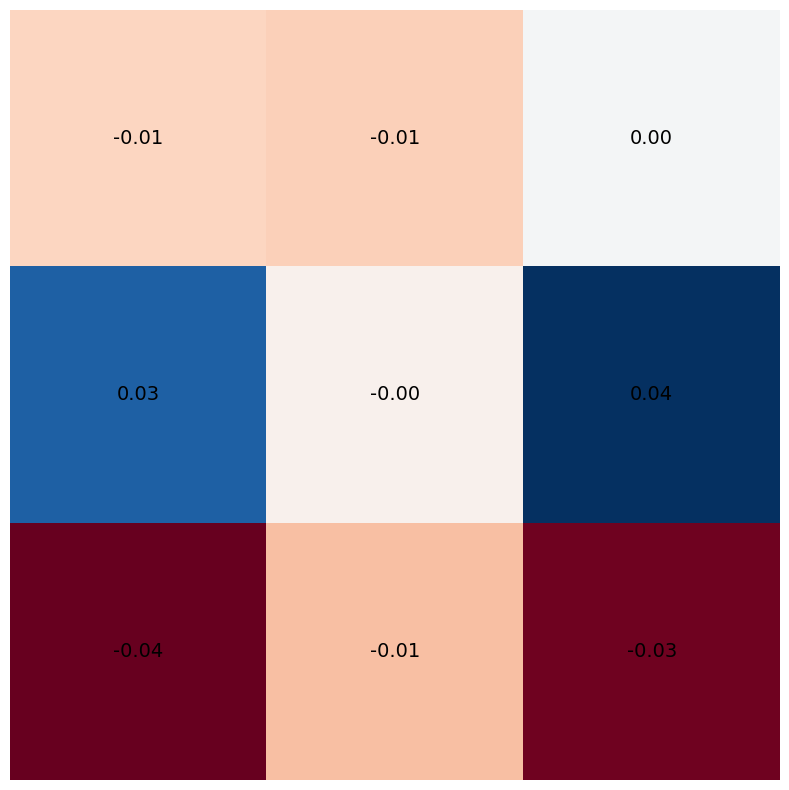

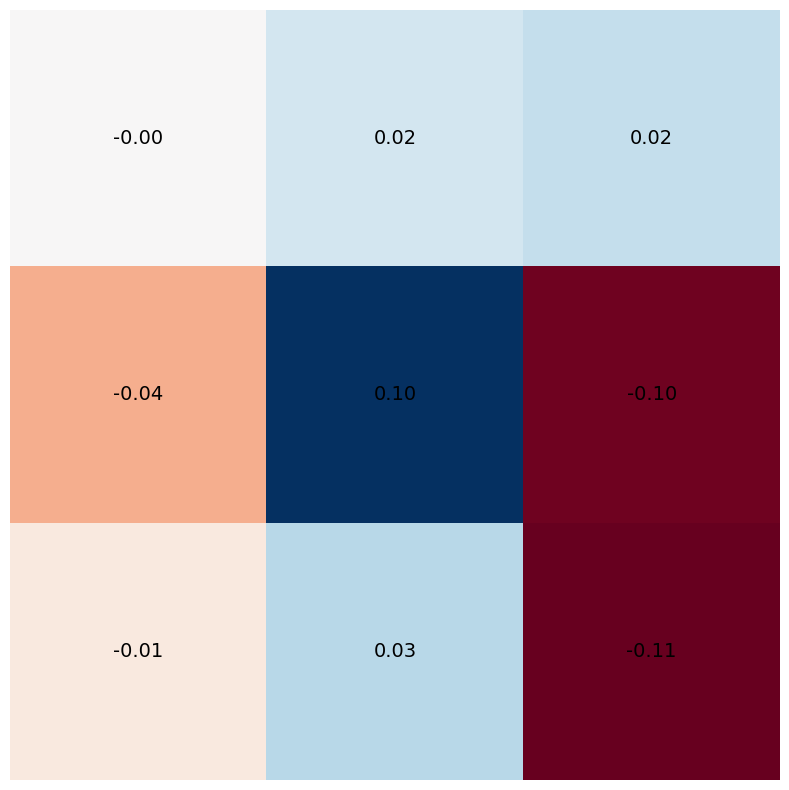

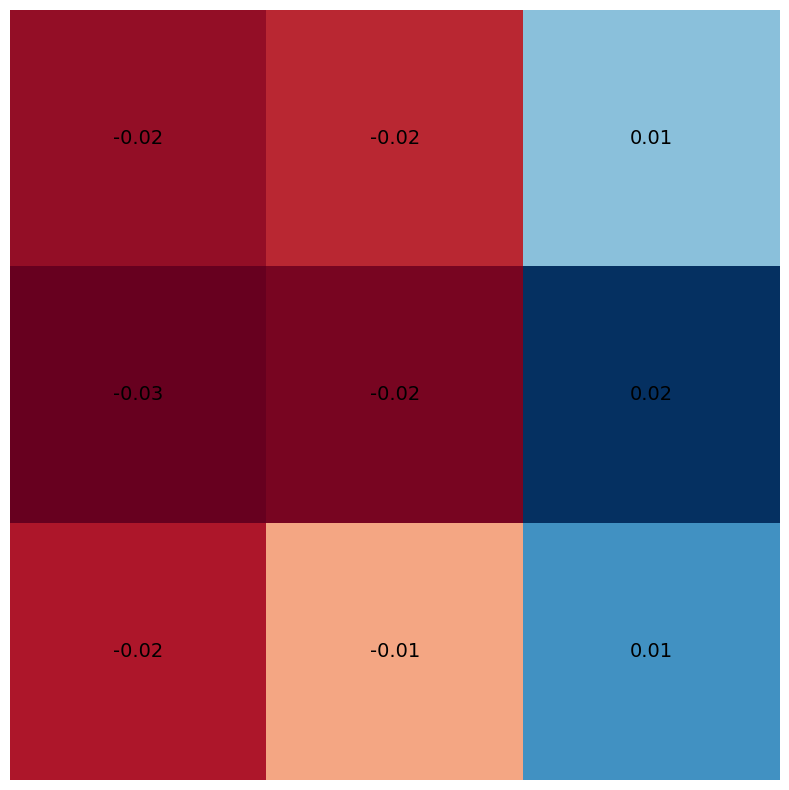

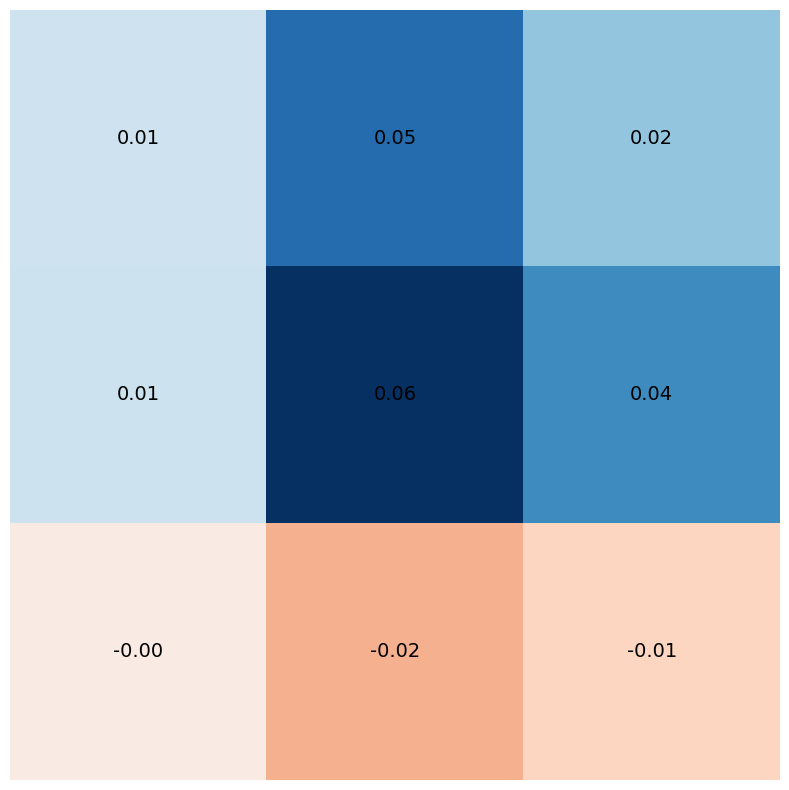

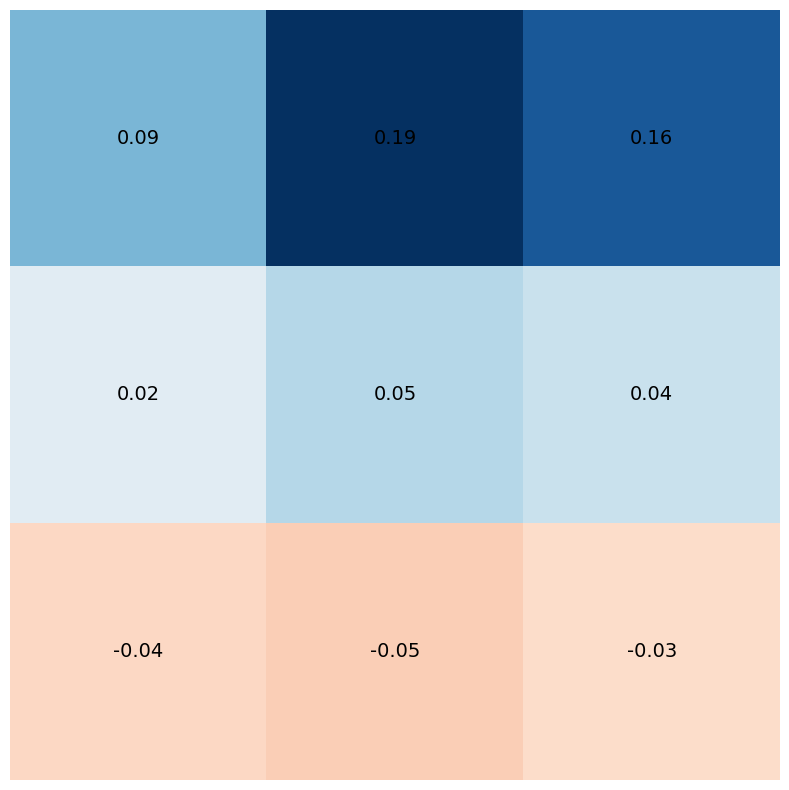

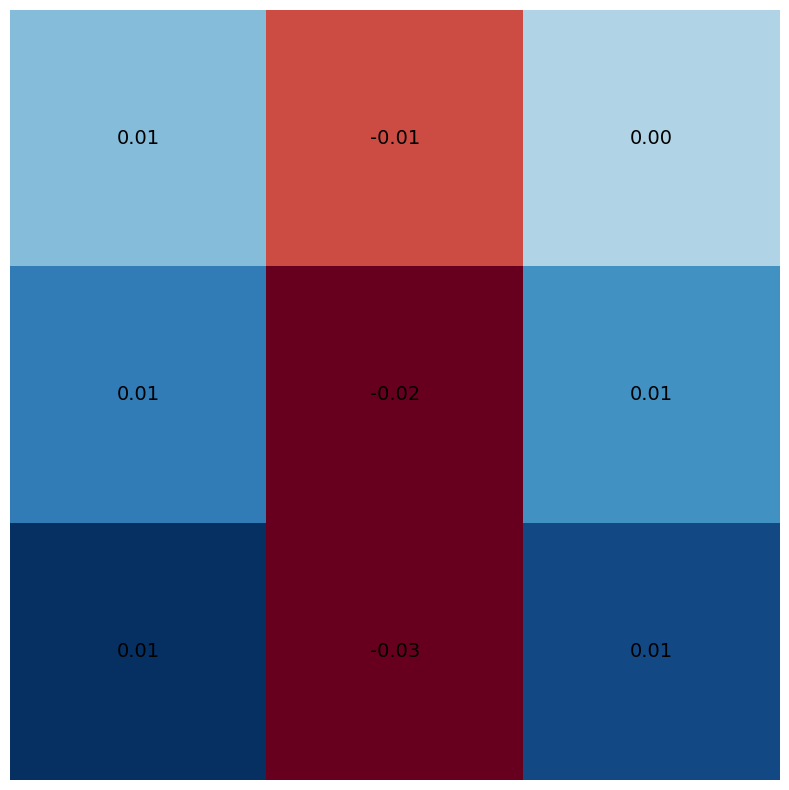

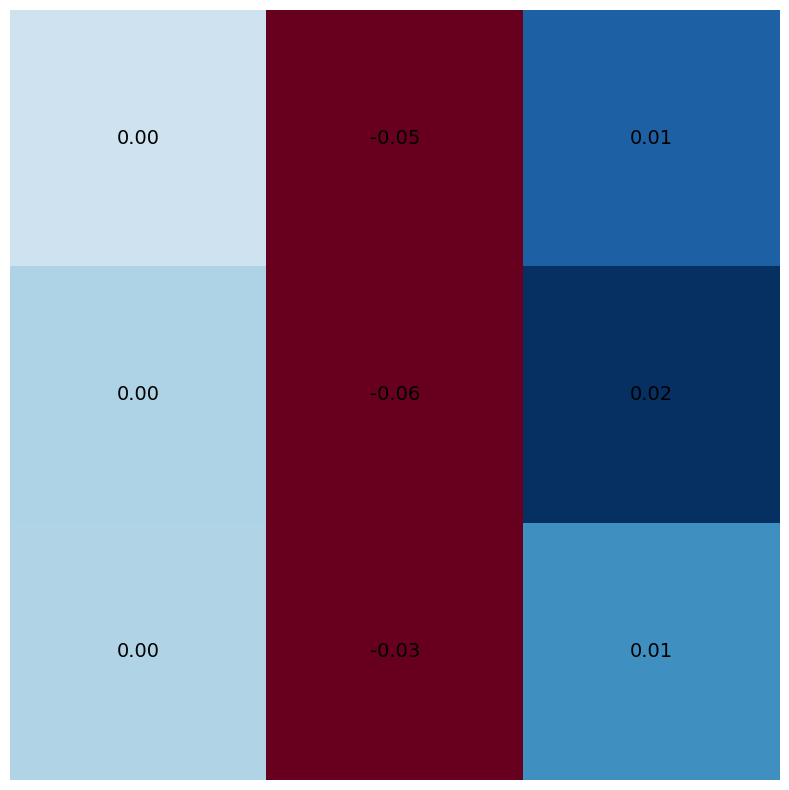

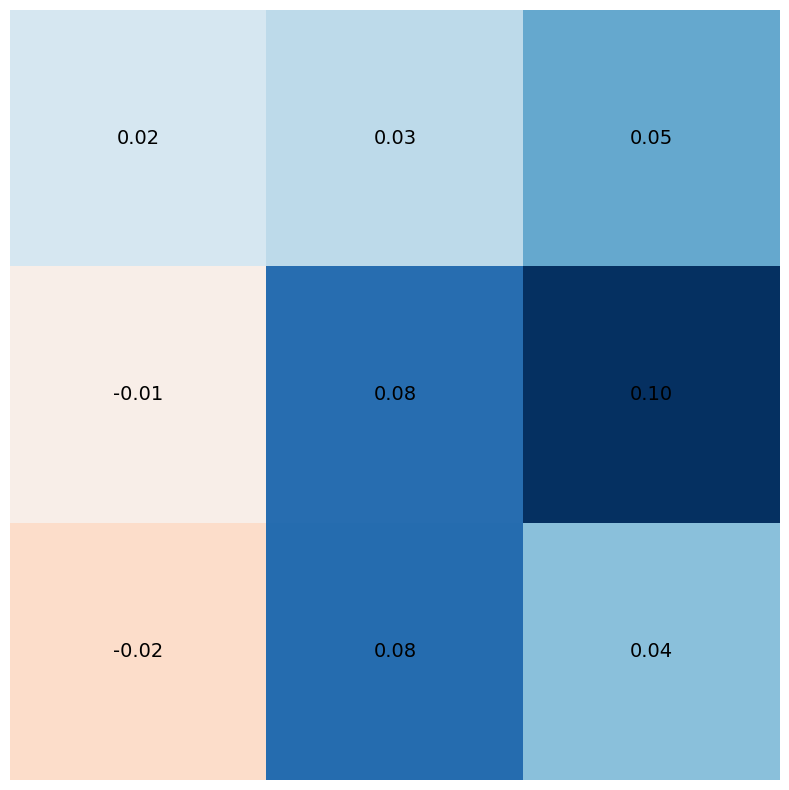

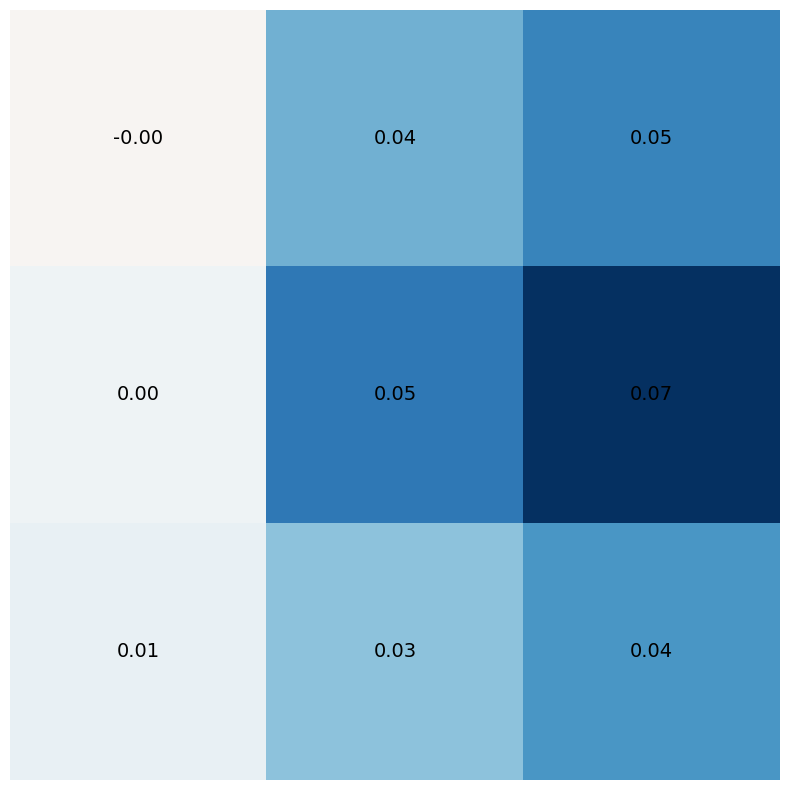

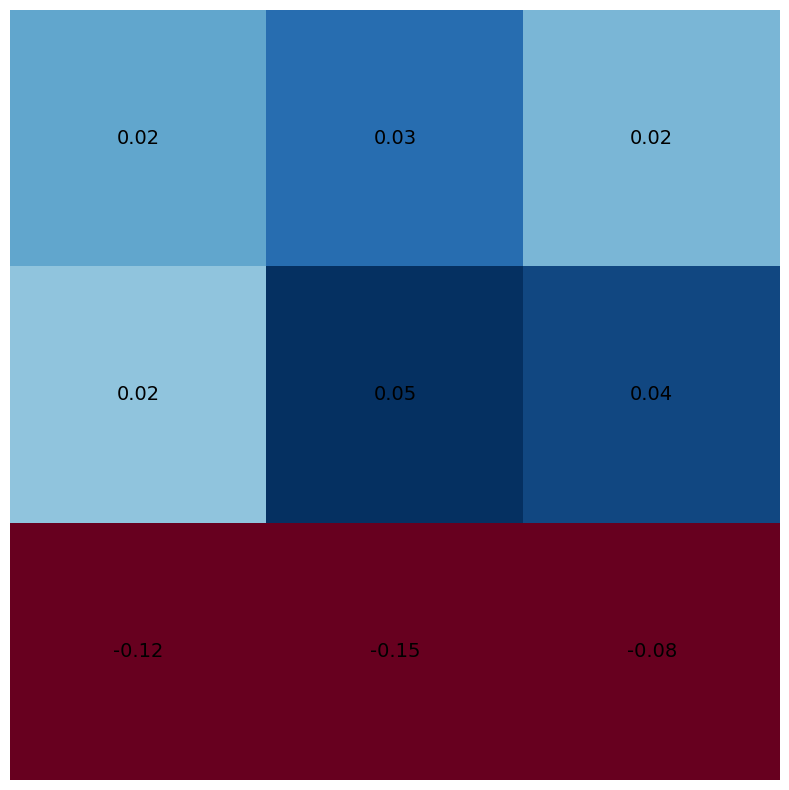

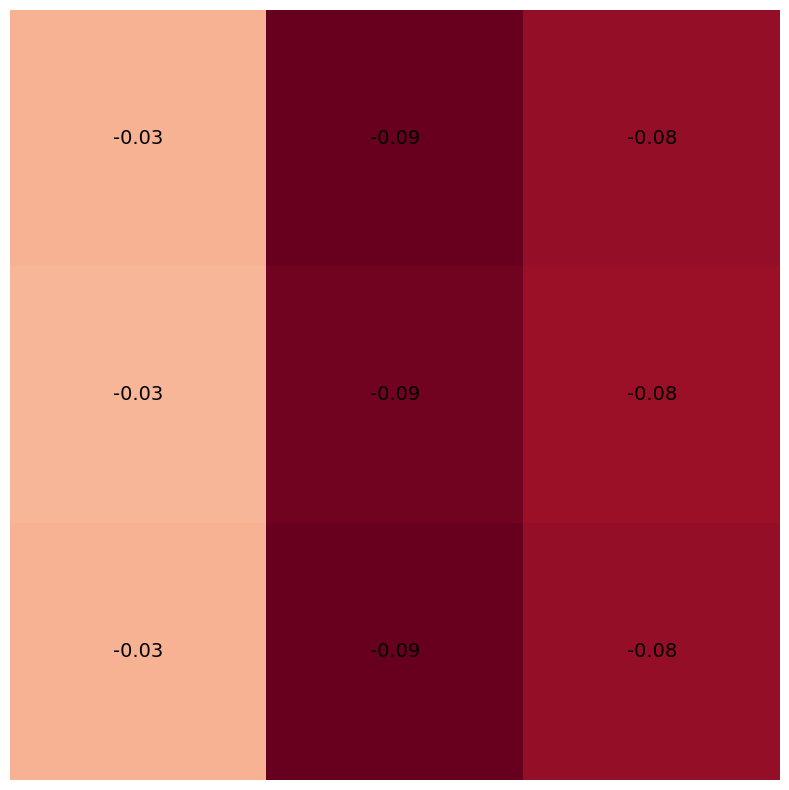

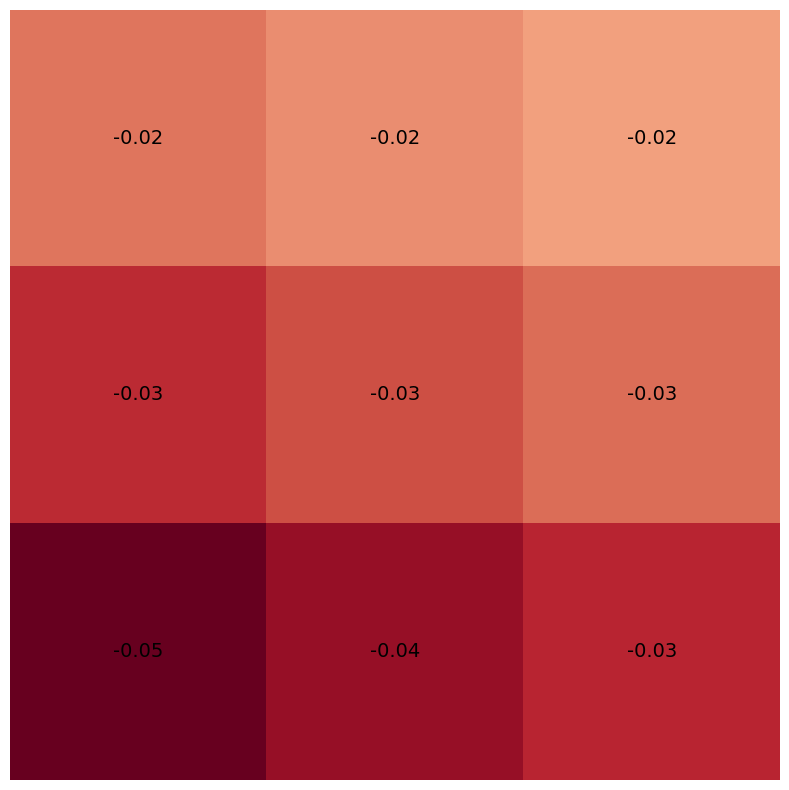

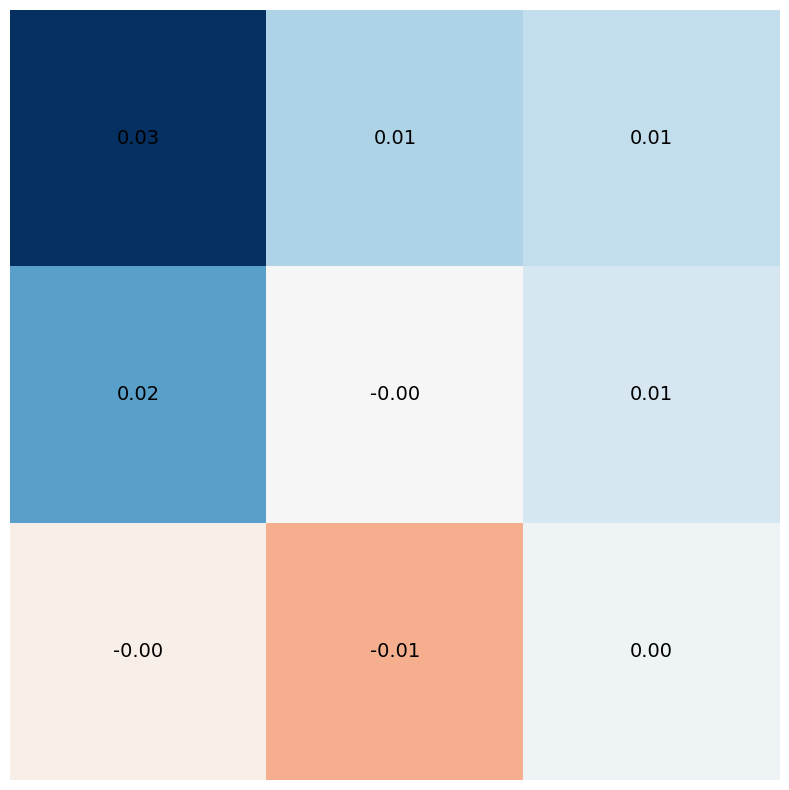

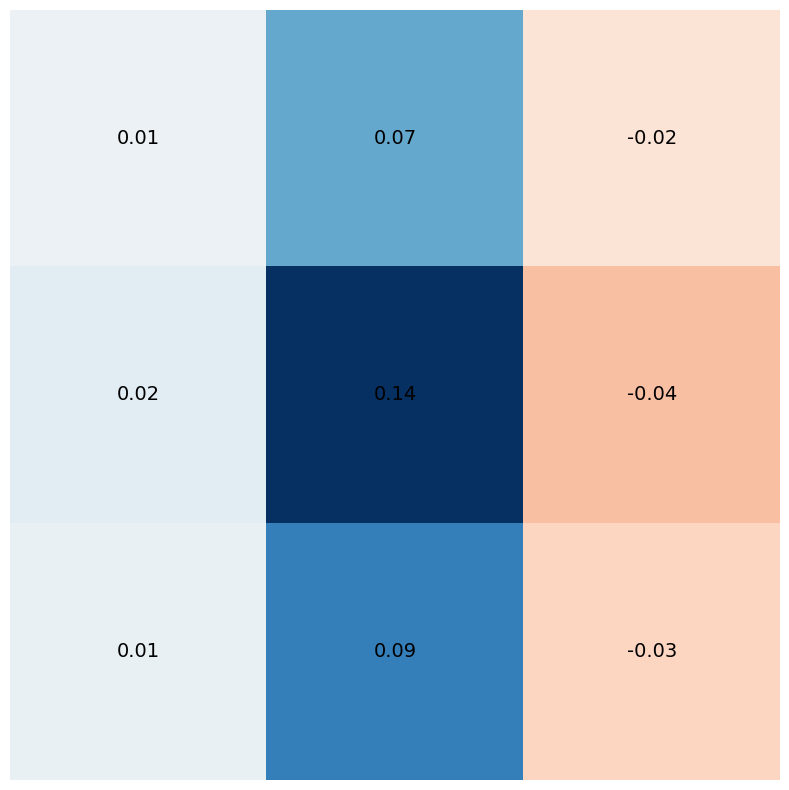

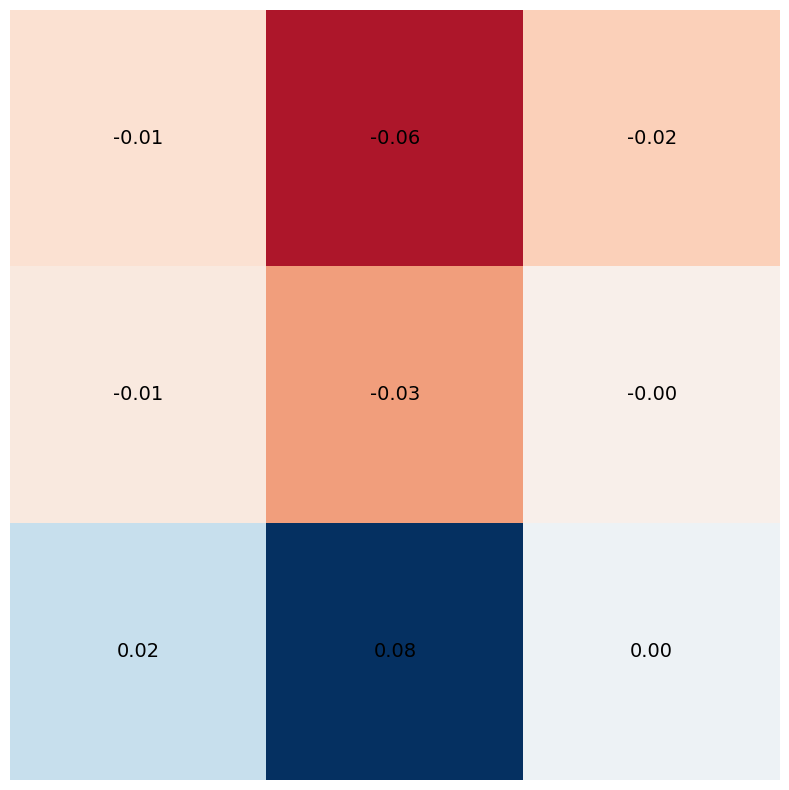

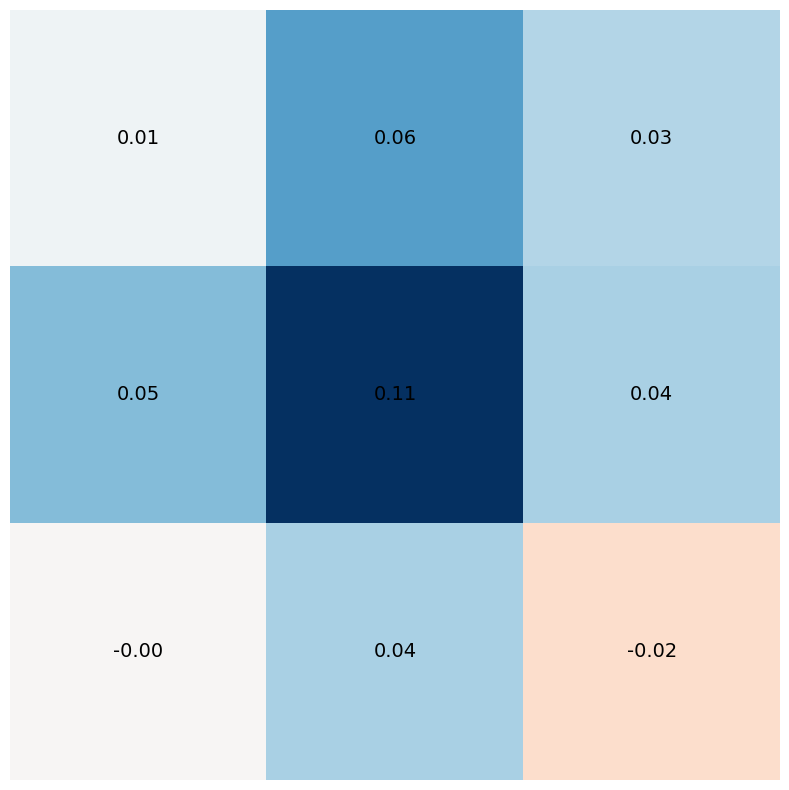

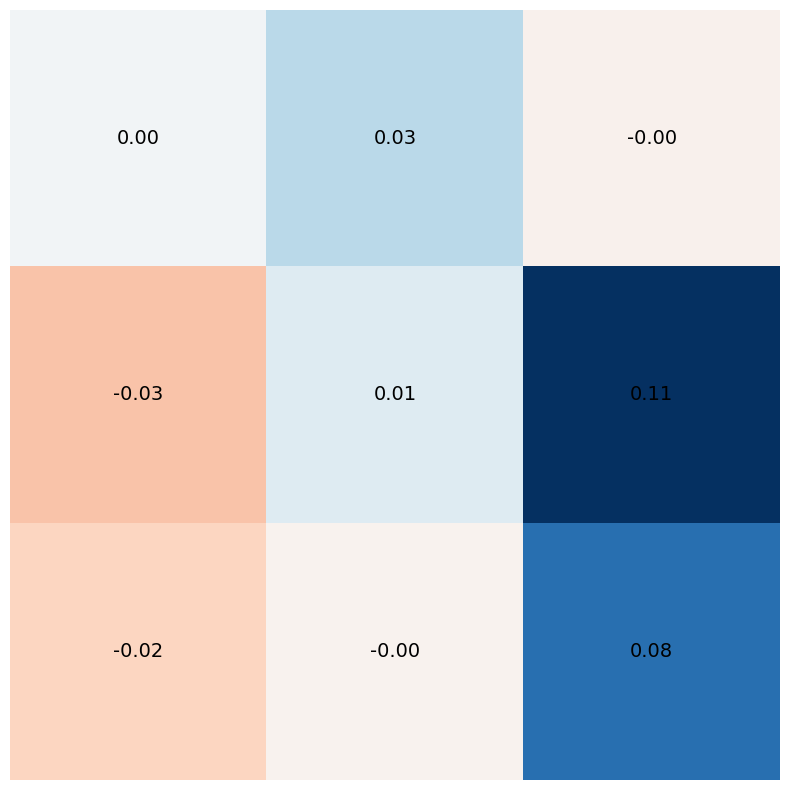

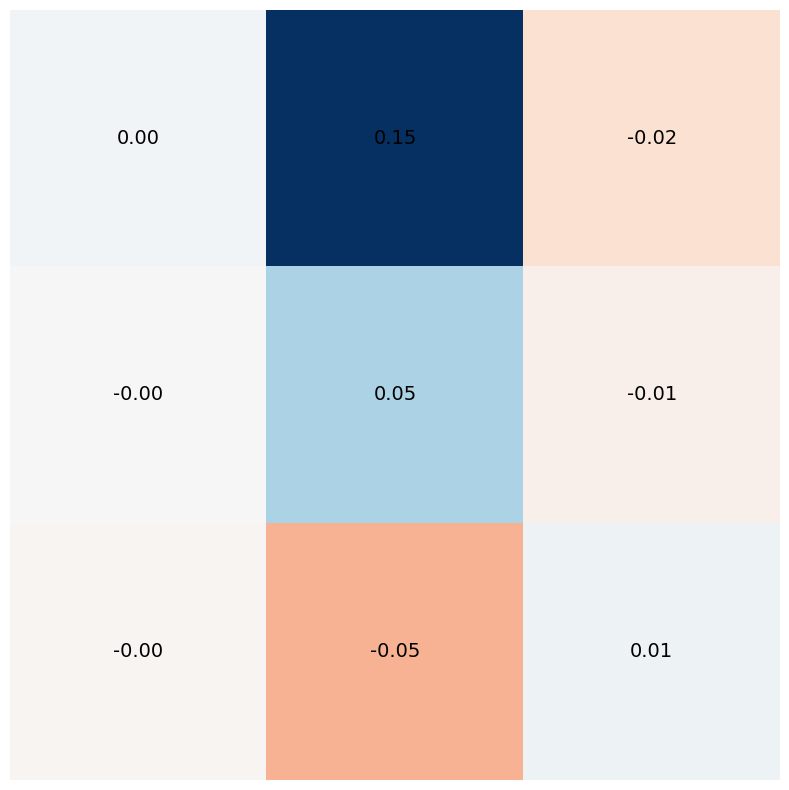

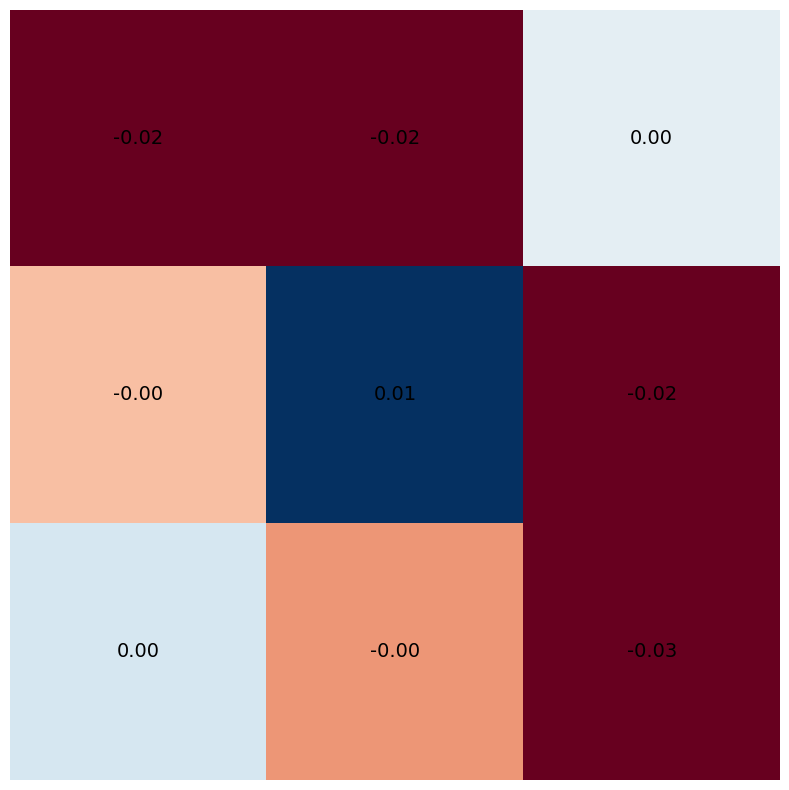

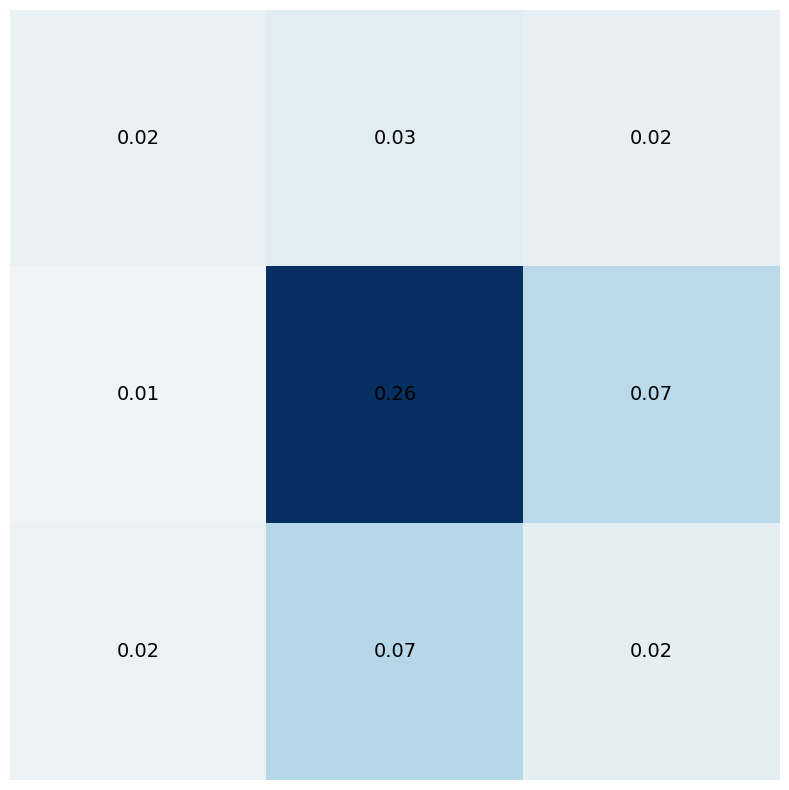

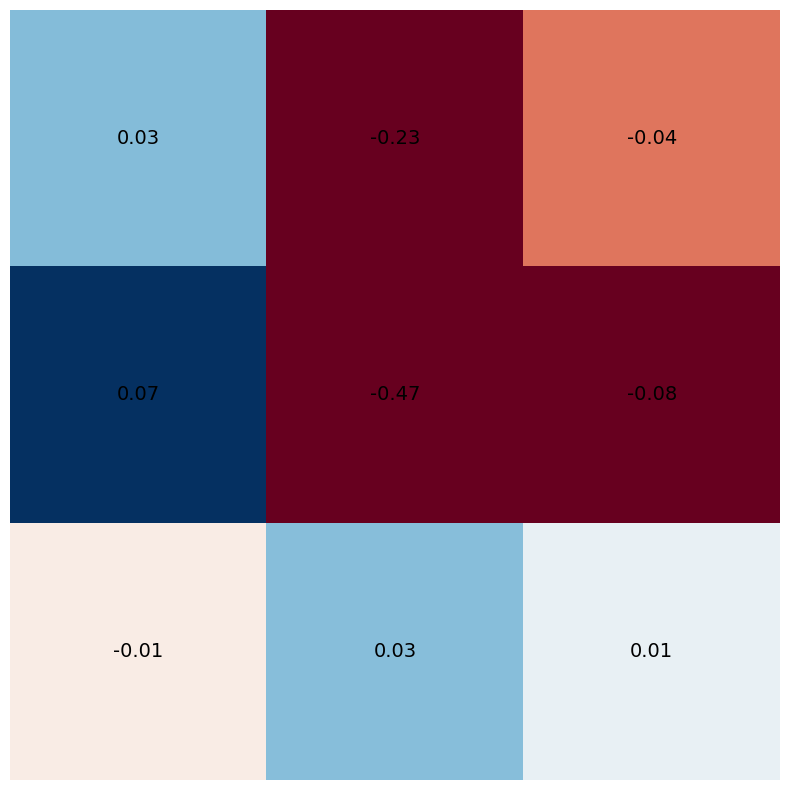

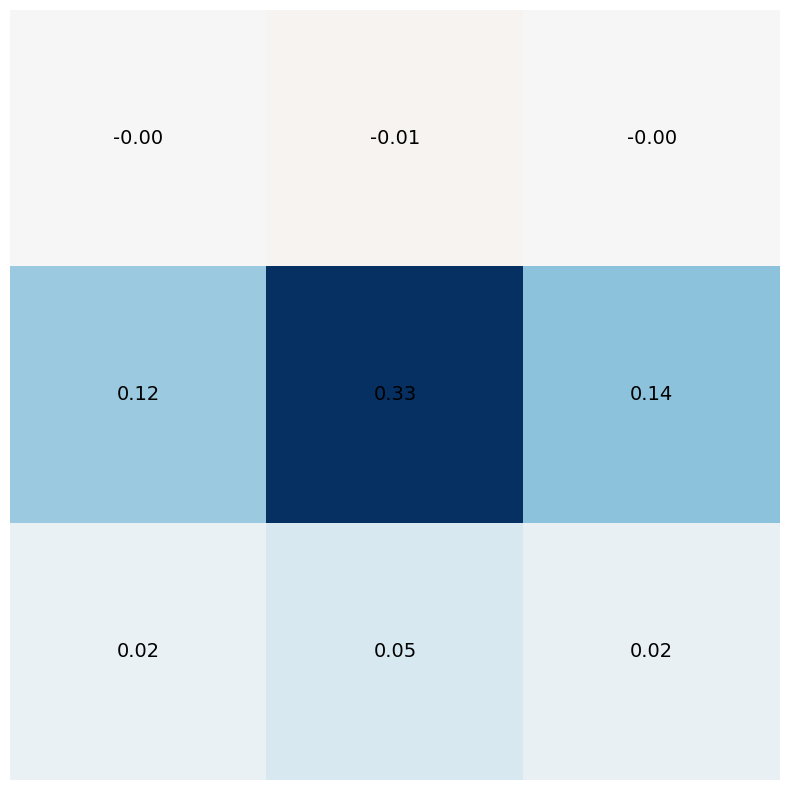

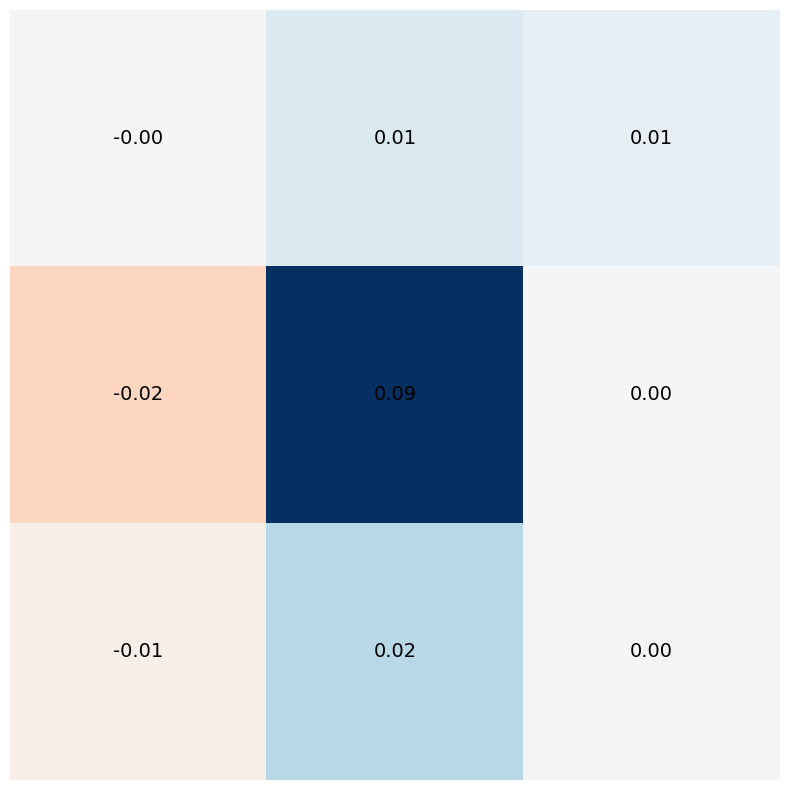

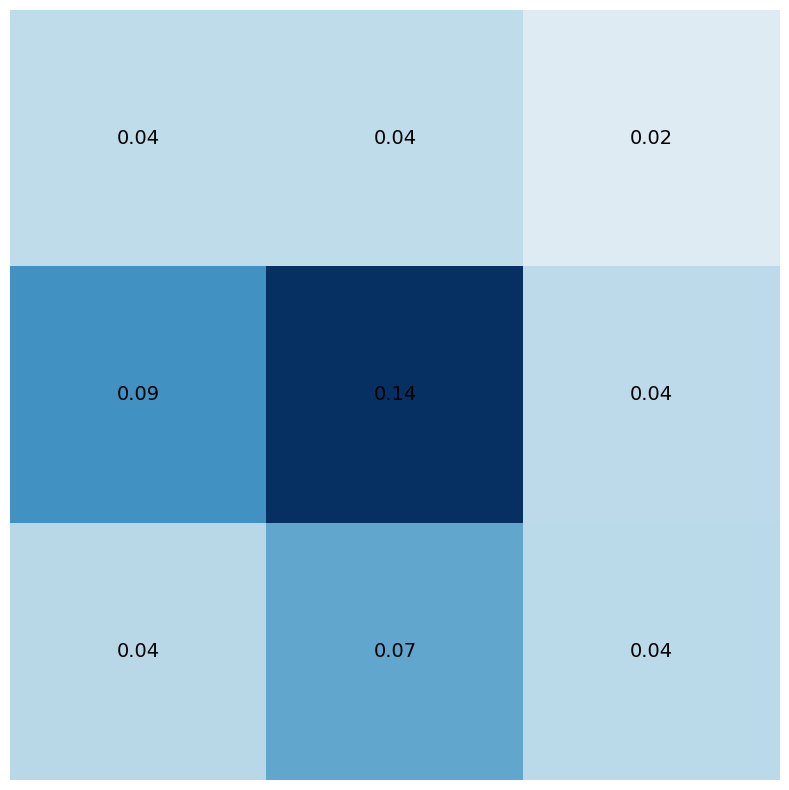

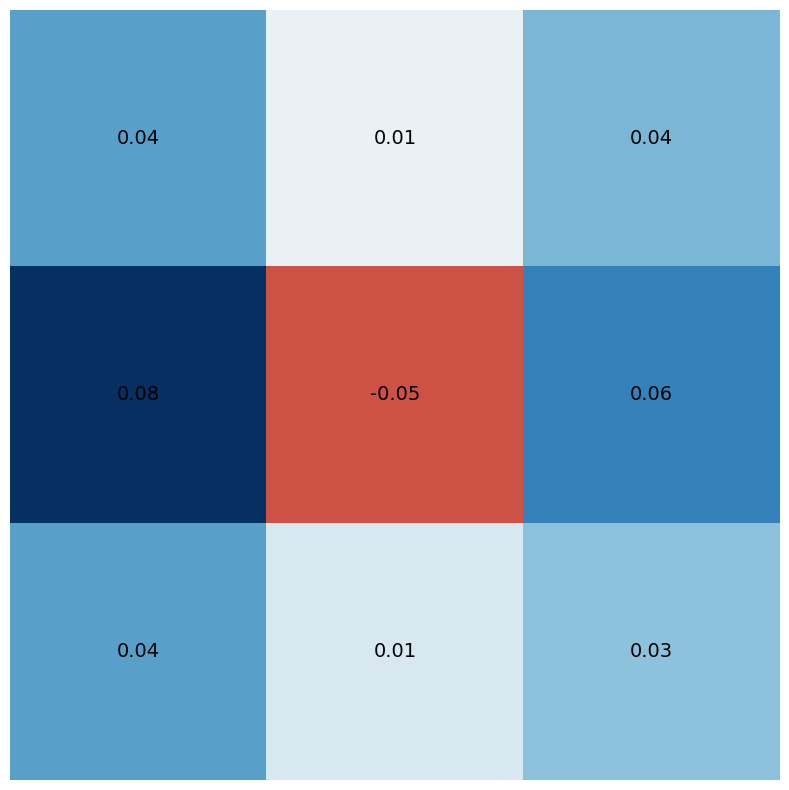

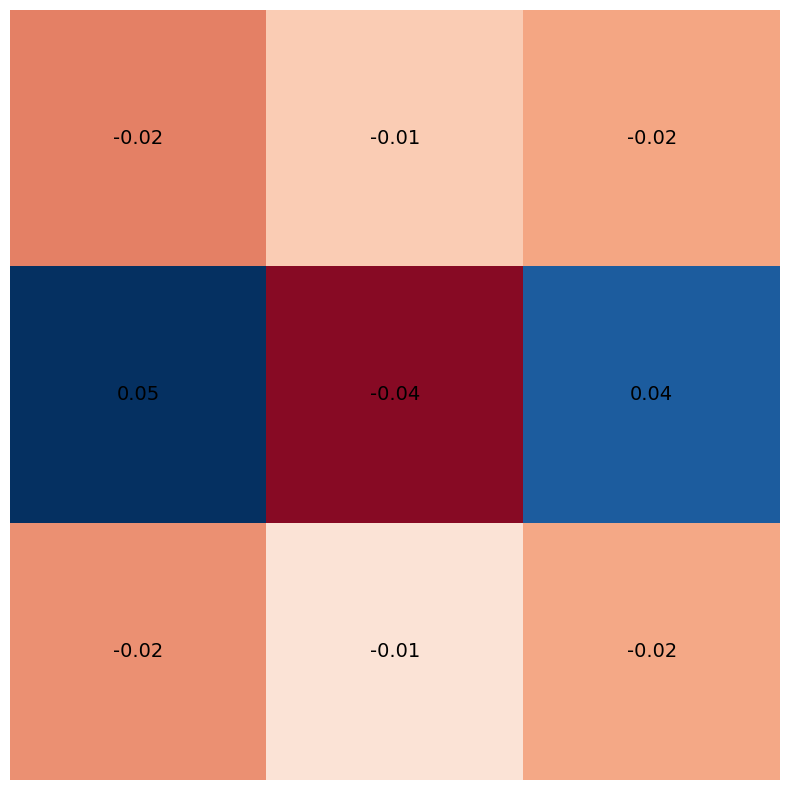

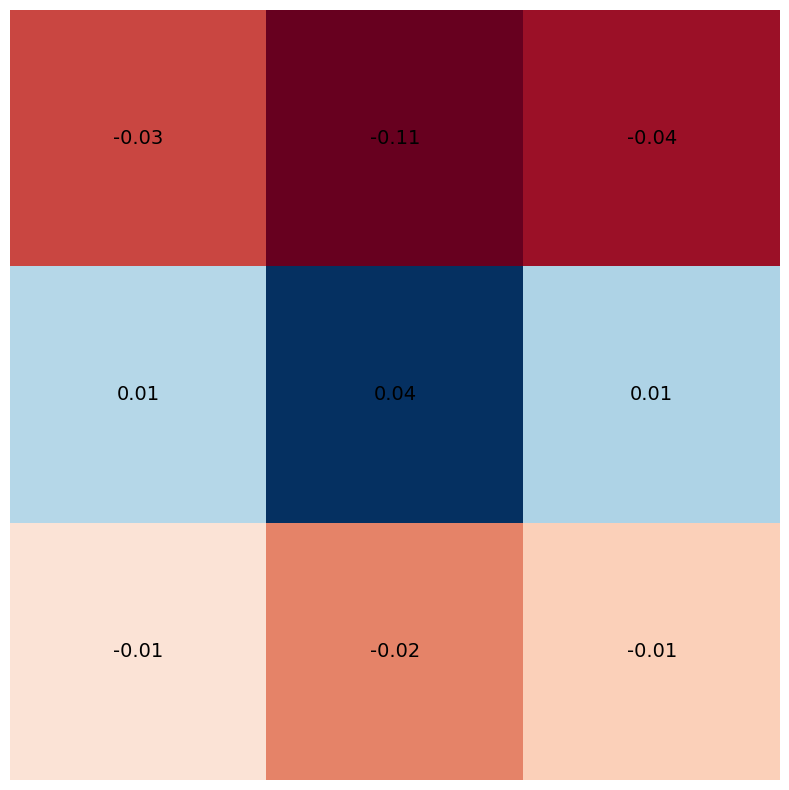

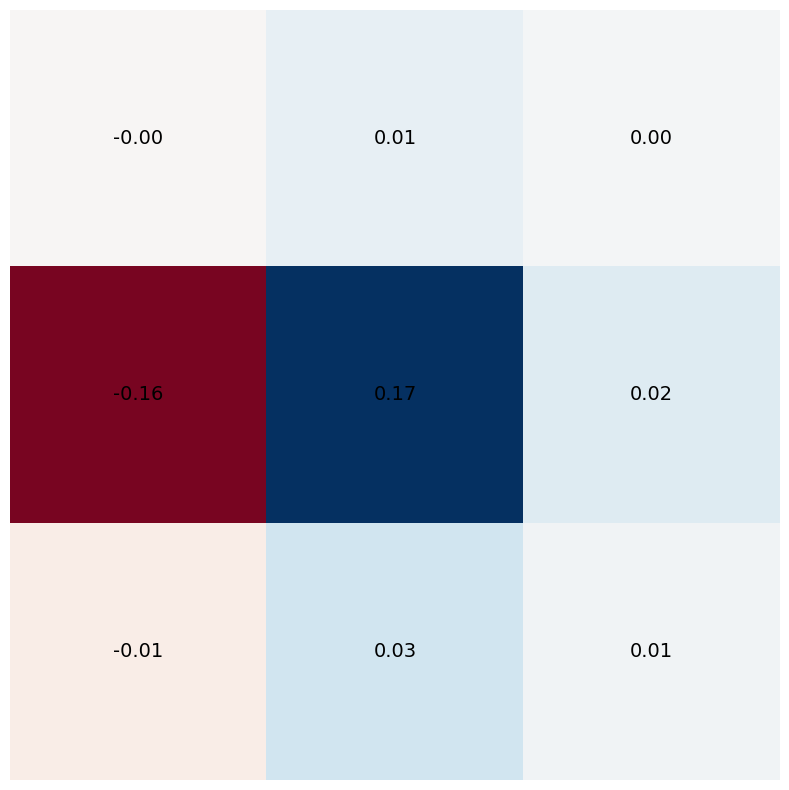

In [4]:
i = 1
for weight in weights:
    filename = "/users/skoka/Documents/Final_Paper_ML/images/" + first_best[i].split(".")[0] + "_weights" +".png"
    plot_weights(weight, filename)
    i+=1

In [6]:
%matplotlib inline
def plot_filter(layer_number, multi_channel_filter, single_channel_filter, filename):
    sublayer_index = visualizable_layers[layer_number]
    layer = diffusion_model.layers[layer_number].get_weights()[sublayer_index]
    print(layer.shape)
    single_channel = layer[:, :, multi_channel_filter, single_channel_filter]
    fig, axs = plt.subplots(1, 1, figsize=(15, 10), gridspec_kw={'hspace': 0.5, 'wspace': 0.3})

    # Set up the colormap
    cmap = plt.cm.get_cmap('RdBu').copy()
    cmap.set_bad(color='white')

    # Display the image
    if np.max(single_channel) >= 0:
        vmin = -np.max(single_channel)
        vmax = np.max(single_channel)
    else:
        vmin = np.min(single_channel)
        vmax = -np.min(single_channel)
    im = axs.imshow(single_channel, cmap=cmap, vmin=vmin, vmax=vmax)

    # Turn off axis labels
    axs.axis("off")

    # Add text annotations for each element in the tensor
    for i in range(3):
        for j in range(3):
            axs.text(j, i, f"{single_channel[i][j]:.2f}", size=14, ha="center", va="center", color="black")
    plt.savefig(filename)
    # Show the figure
    return plt

9
9 73 176 layer_9_filter_73_weights.png


/tmp/ipykernel_1416278/3353435086.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu').copy()


11
11 7 73 layer_11_filter_7_weights.png
12
12 412 7 layer_12_filter_412_weights.png
14
14 386 412 layer_14_filter_386_weights.png
16
16 627 386 layer_16_filter_627_weights.png
17
17 1214 627 layer_17_filter_1214_weights.png
19
19 407 1214 layer_19_filter_407_weights.png
21
21 336 407 layer_21_filter_336_weights.png
22
22 757 336 layer_22_filter_757_weights.png
23
23 757 757 layer_23_filter_757_weights.png
24
24 661 757 layer_24_filter_661_weights.png
26
26 661 661 layer_26_filter_661_weights.png
28
28 418 661 layer_28_filter_418_weights.png
30
30 148 418 layer_30_filter_148_weights.png
32
32 741 148 layer_32_filter_741_weights.png
33
33 579 741 layer_33_filter_579_weights.png
35
35 1016 579 layer_35_filter_1016_weights.png
38
38 82 1016 layer_38_filter_82_weights.png
41
41 532 82 layer_41_filter_532_weights.png
43
43 962 532 layer_43_filter_962_weights.png
45
45 470 962 layer_45_filter_470_weights.png


IndexError: index 962 is out of bounds for axis 2 with size 640

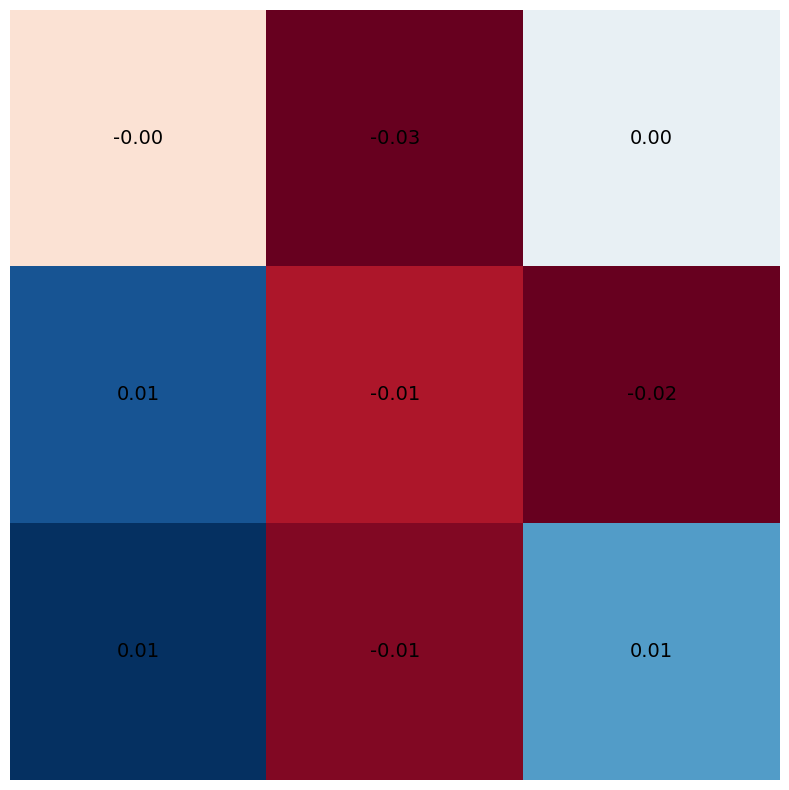

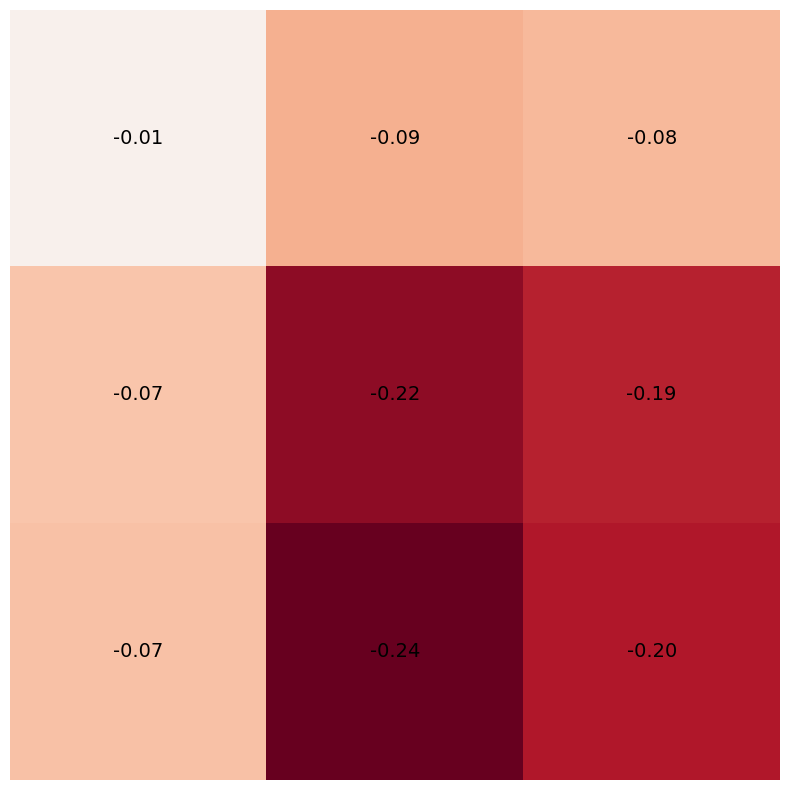

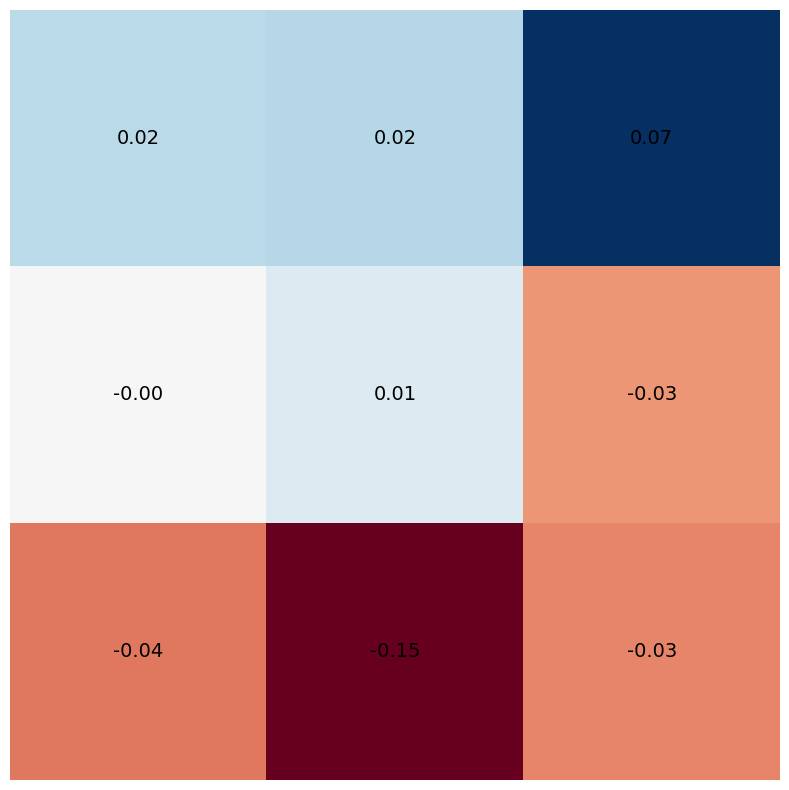

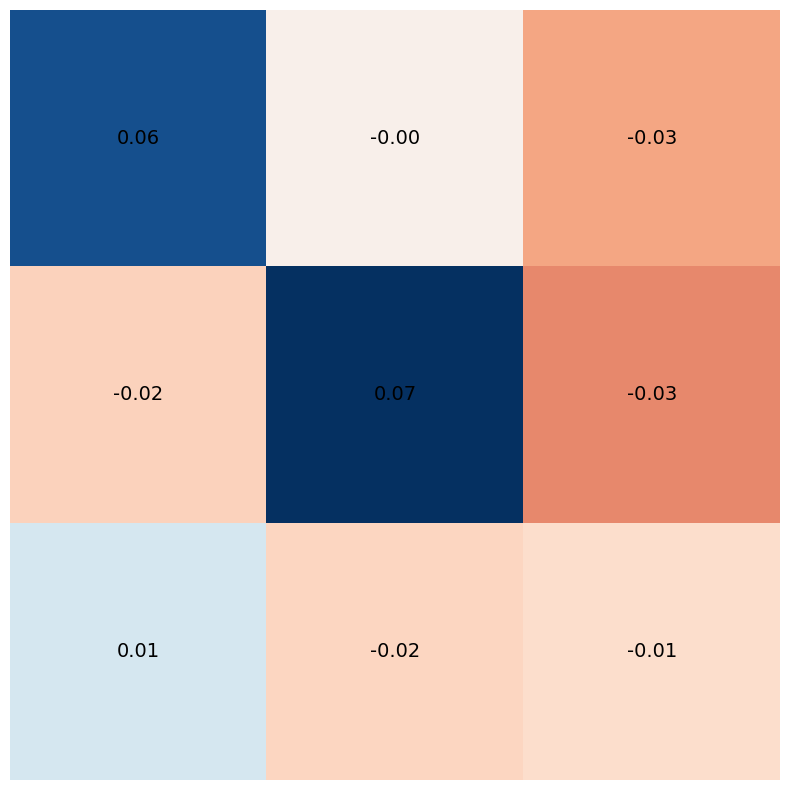

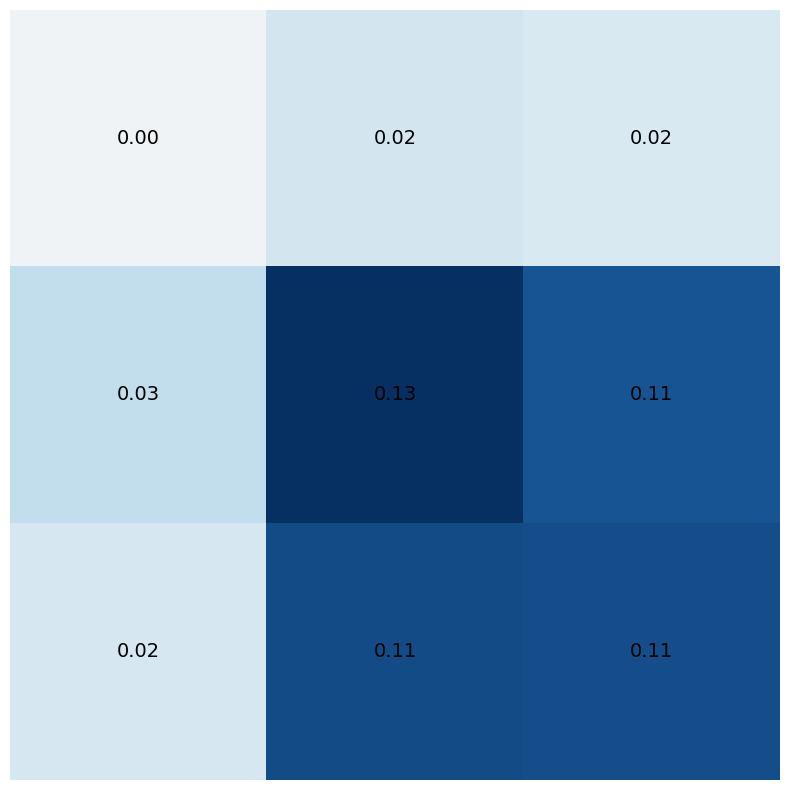

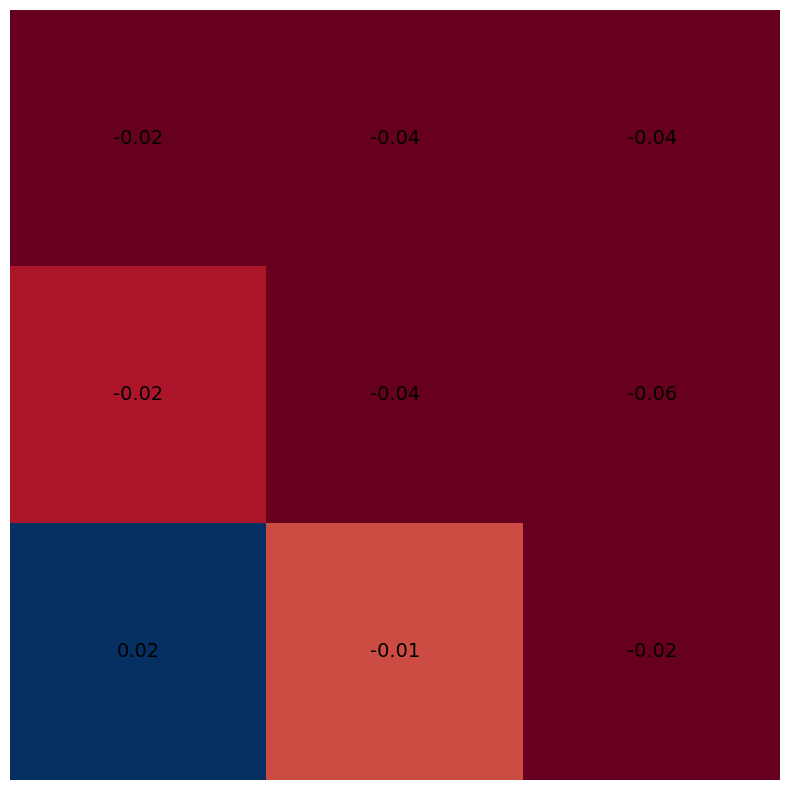

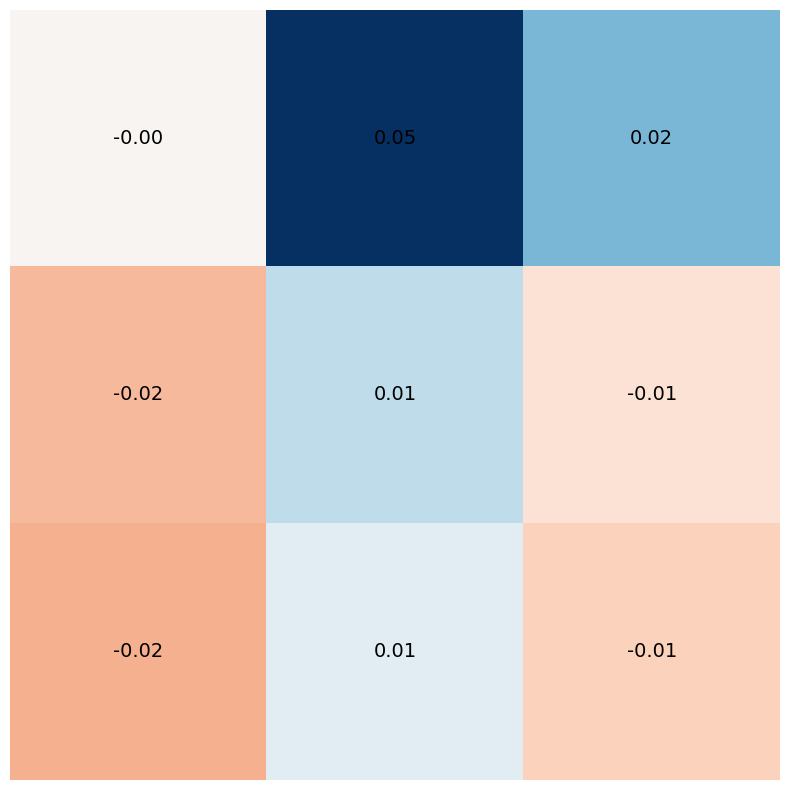

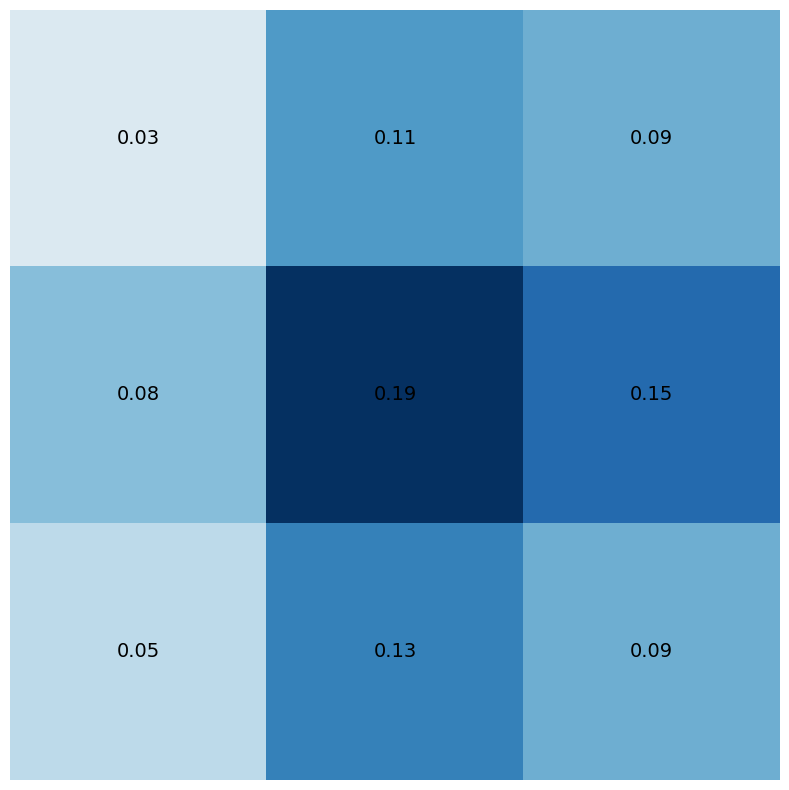

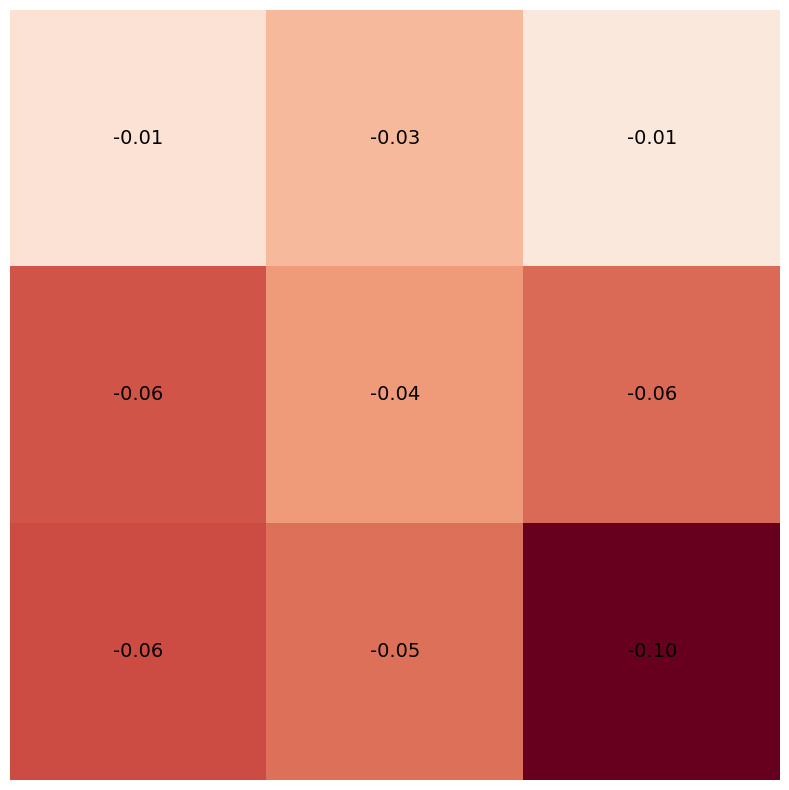

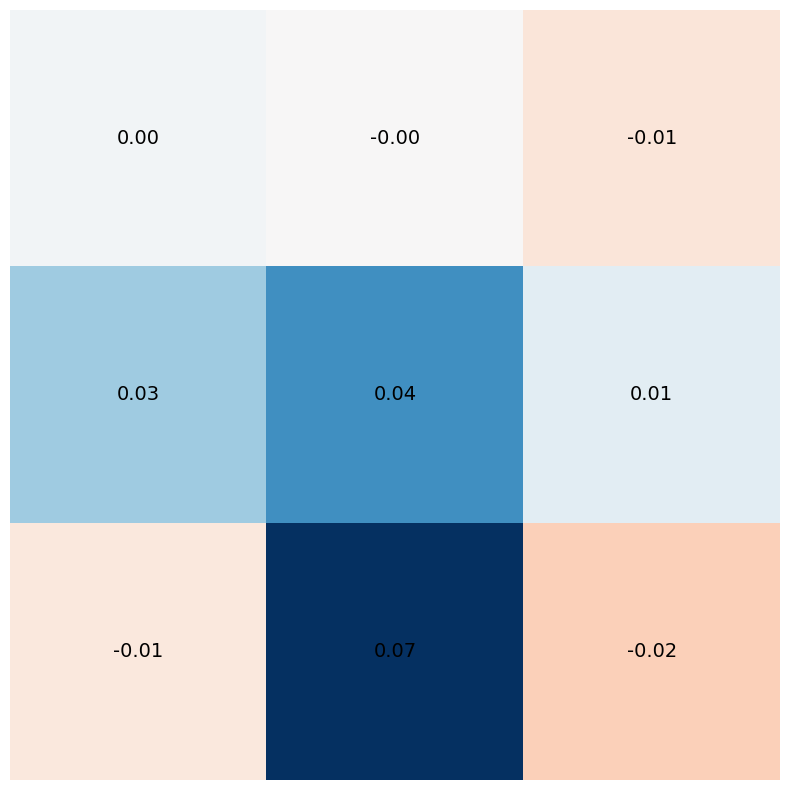

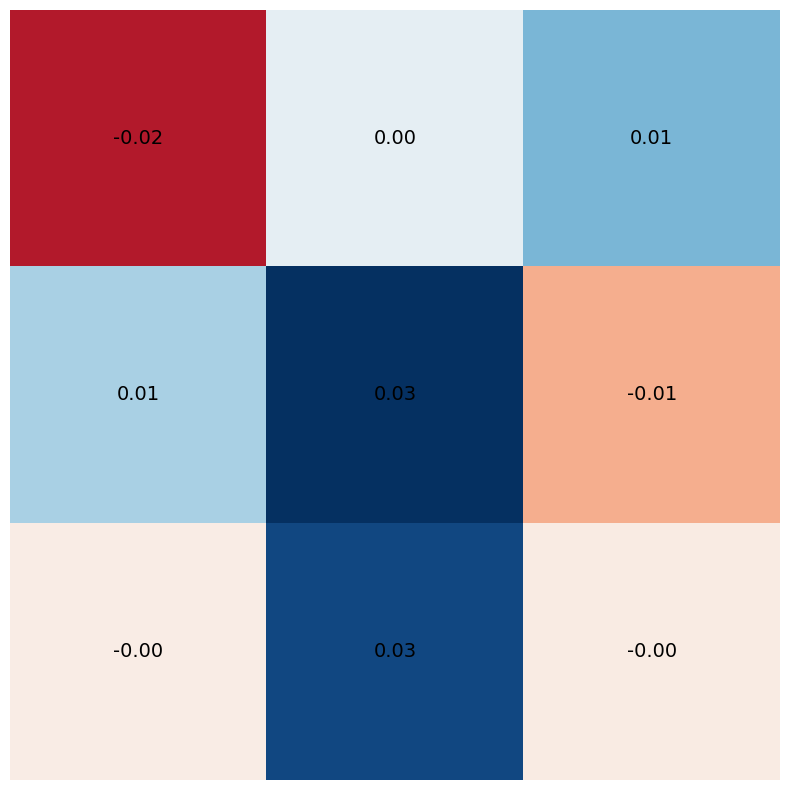

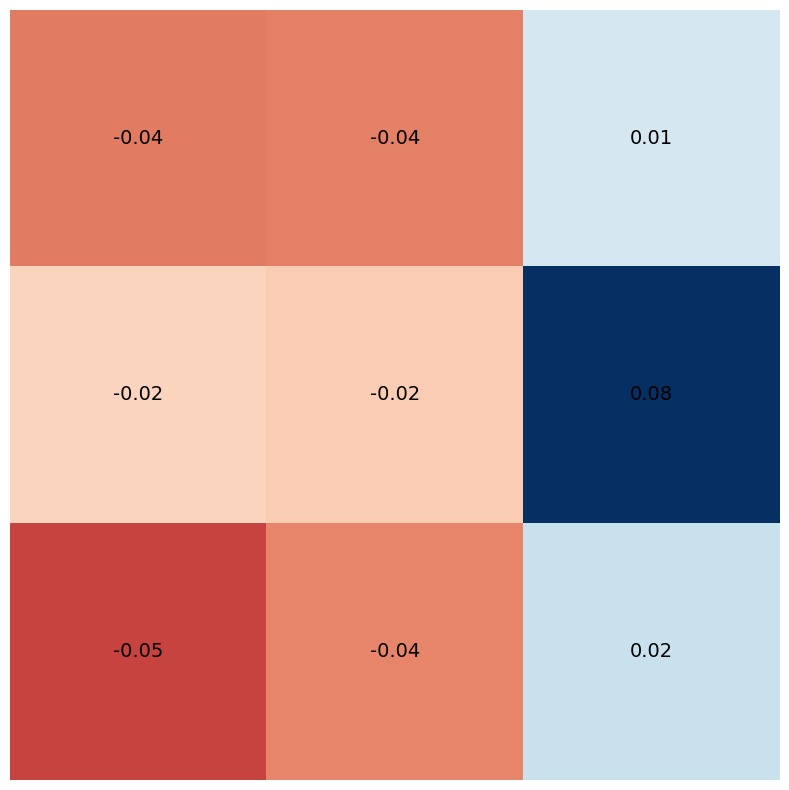

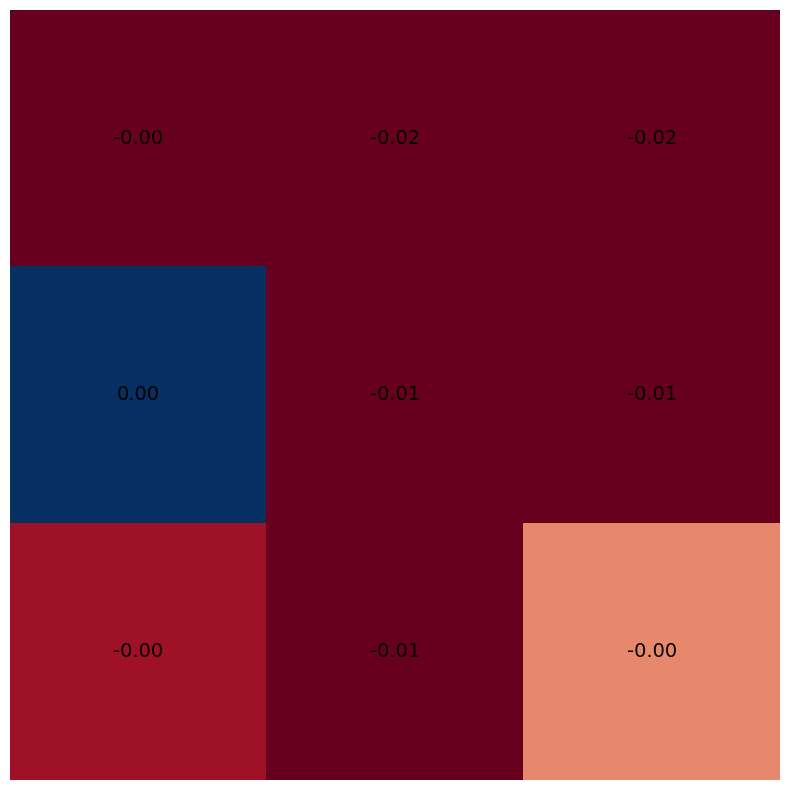

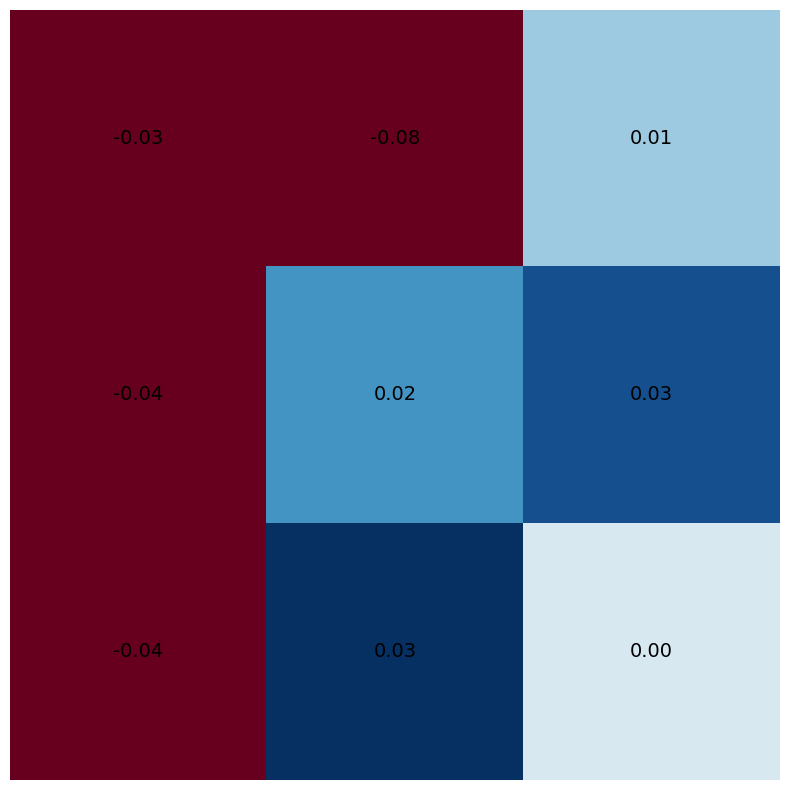

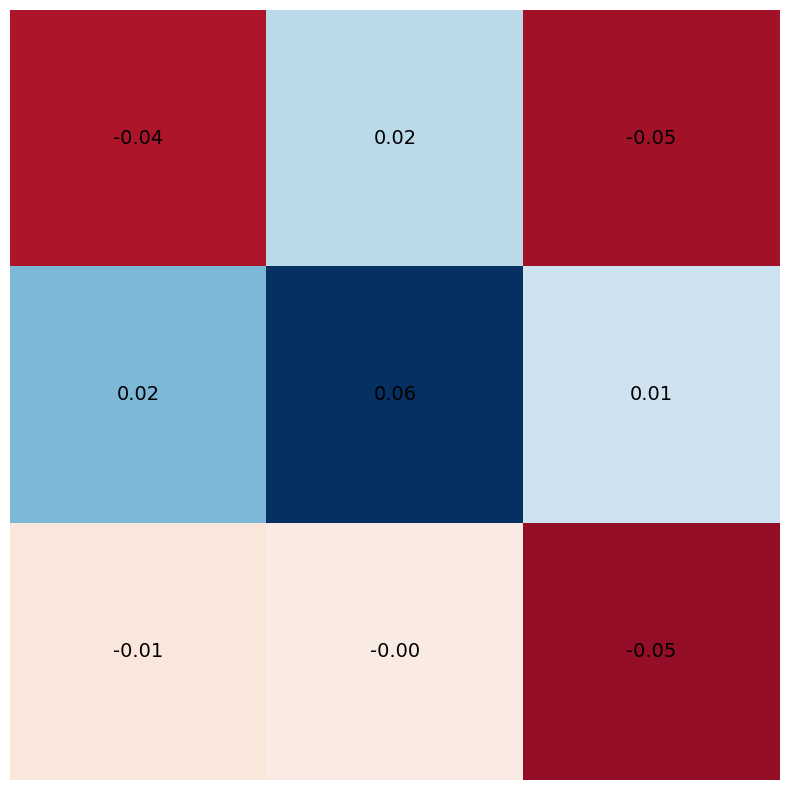

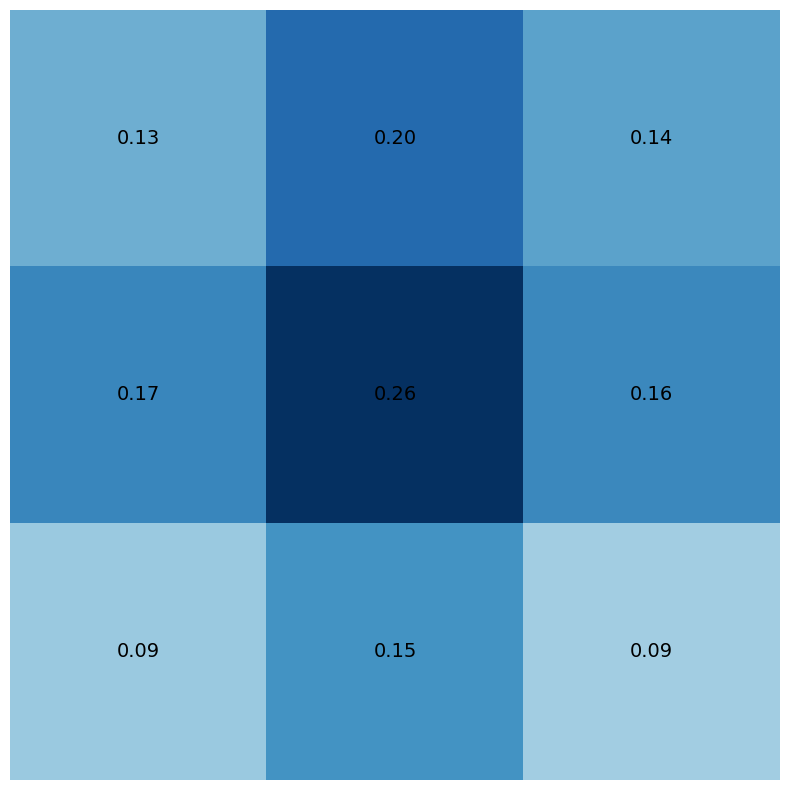

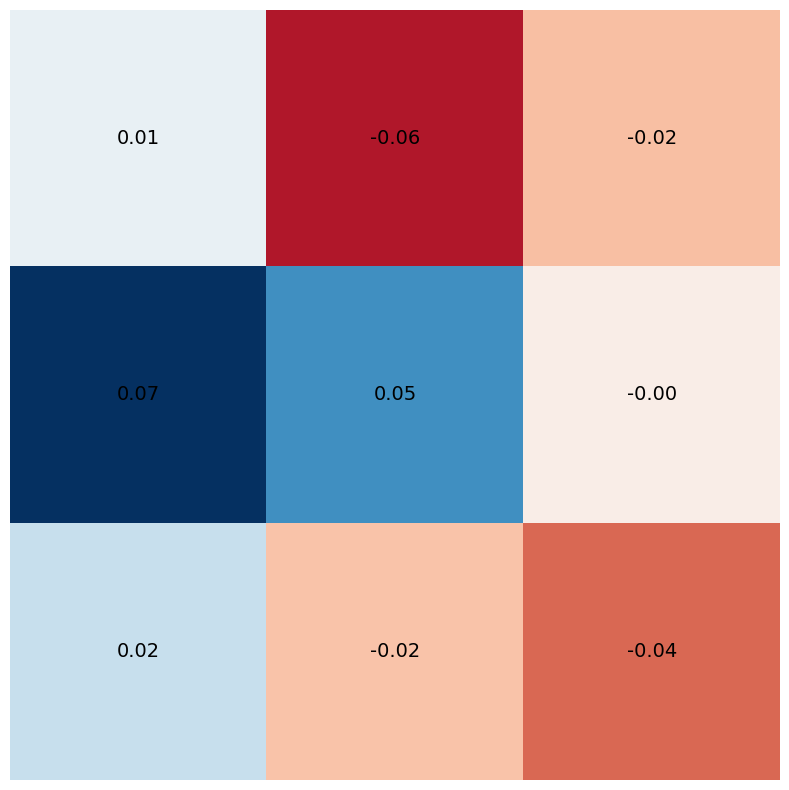

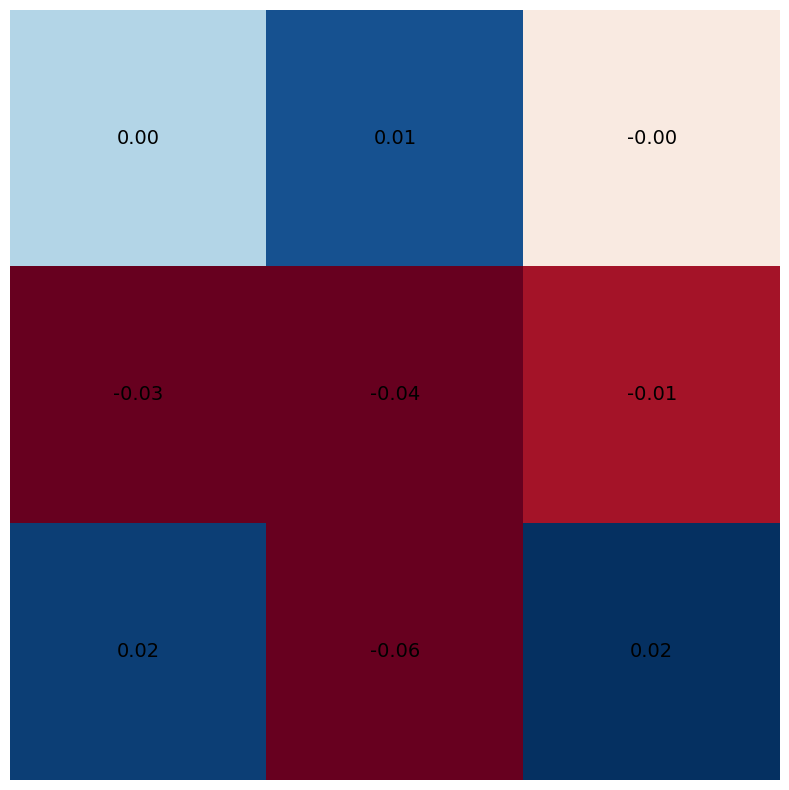

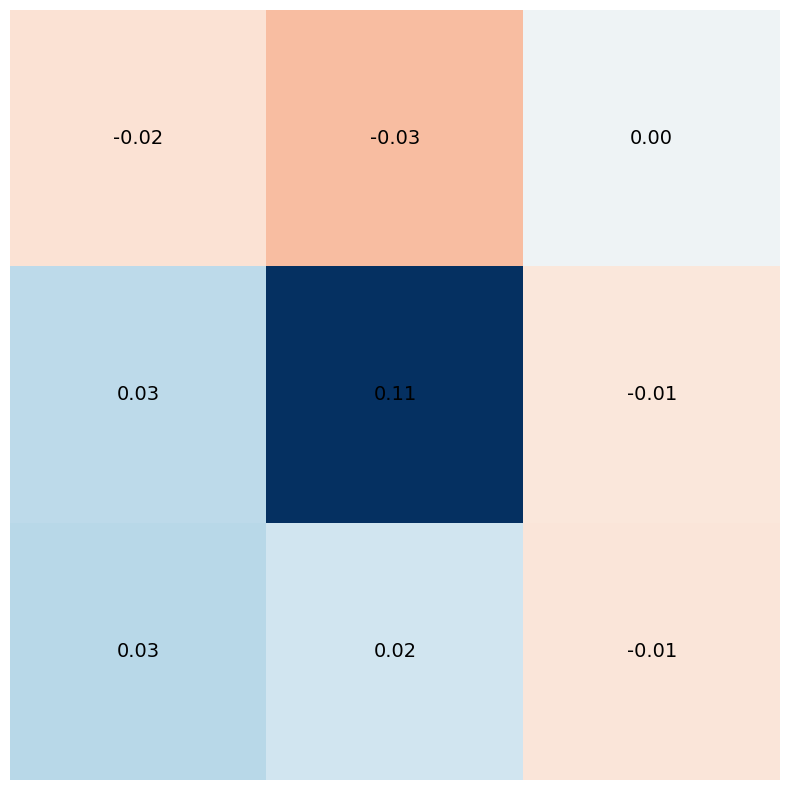

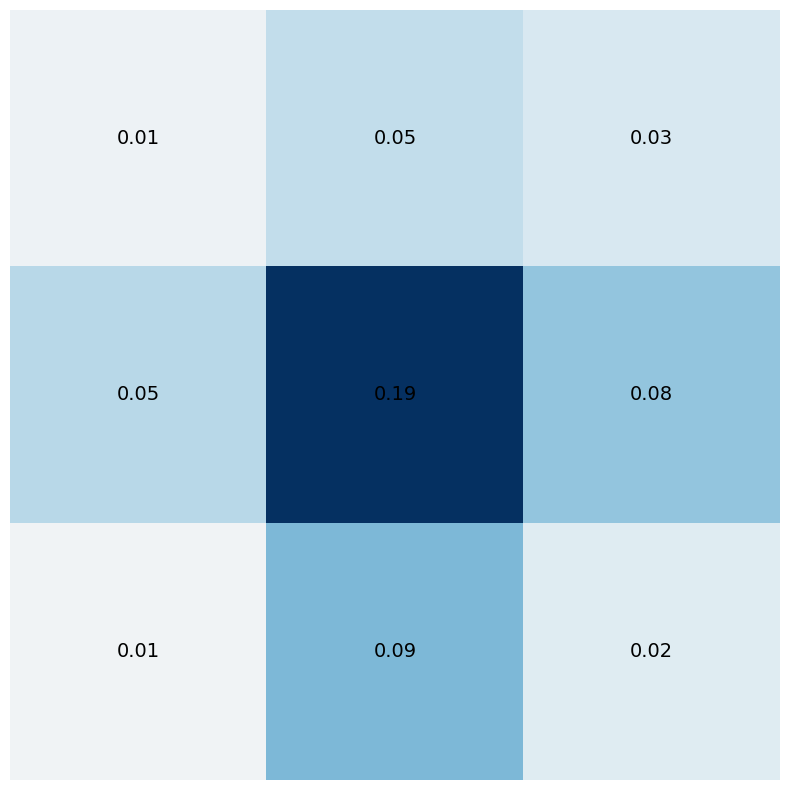

In [87]:
%matplotlib inline
i = 1
for filter in specific_filters:
    layer_number, multi_channel_filter, single_channel_filter = filter
    filename = first_best[i].split(".")[0] + "_weights" +".png"
    plot_filter(layer_number, single_channel_filter, multi_channel_filter, filename)
    i += 1

In [14]:
specific_filters

[(9, 73, 176),
 (11, 7, 73),
 (12, 412, 7),
 (14, 386, 412),
 (16, 627, 386),
 (17, 1214, 627),
 (19, 407, 1214),
 (21, 336, 407),
 (22, 757, 336),
 (23, 757, 757),
 (24, 661, 757),
 (26, 661, 661),
 (28, 418, 661),
 (30, 148, 418),
 (32, 741, 148),
 (33, 579, 741),
 (35, 1016, 579),
 (38, 82, 1016),
 (41, 532, 82),
 (43, 962, 532),
 (45, 470, 962),
 (48, 279, 470),
 (51, 398, 279),
 (53, 631, 398),
 (55, 187, 631),
 (58, 227, 187),
 (61, 303, 227),
 (65, 3, 303)]